# Problem 1.1 - Exploit Data

In [1]:
import pandas as pd
from pandas.plotting import scatter_matrix
import mglearn

In [2]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

In [3]:
print("Keys of iris_dataset:\n{}".format(iris_dataset.keys()))

Keys of iris_dataset:
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [4]:
print(iris_dataset['DESCR'][:193] + "\n...")

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive 
...


In [5]:
print("Target names: {}".format(iris_dataset['target_names']))

Target names: ['setosa' 'versicolor' 'virginica']


In [6]:
print("Feature names:\n{}".format(iris_dataset['feature_names']))

Feature names:
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [7]:
print("Type of data: {}".format(type(iris_dataset['data'])))

Type of data: <class 'numpy.ndarray'>


In [8]:
print("Shape of data: {}".format(iris_dataset['data'].shape))

Shape of data: (150, 4)


In [9]:
print("First five columns of data:\n{}".format(iris_dataset['data'][:5]))

First five columns of data:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [10]:
print("Type of target: {}".format(type(iris_dataset['target'])))

Type of target: <class 'numpy.ndarray'>


In [11]:
print("Shape of target: {}".format(iris_dataset['target'].shape))

Shape of target: (150,)


In [12]:
print("Target:\n{}".format(iris_dataset['target']))

Target:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'], iris_dataset['target'], random_state=0)

In [14]:
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))

X_train shape: (112, 4)
y_train shape: (112,)


In [15]:
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

X_test shape: (38, 4)
y_test shape: (38,)


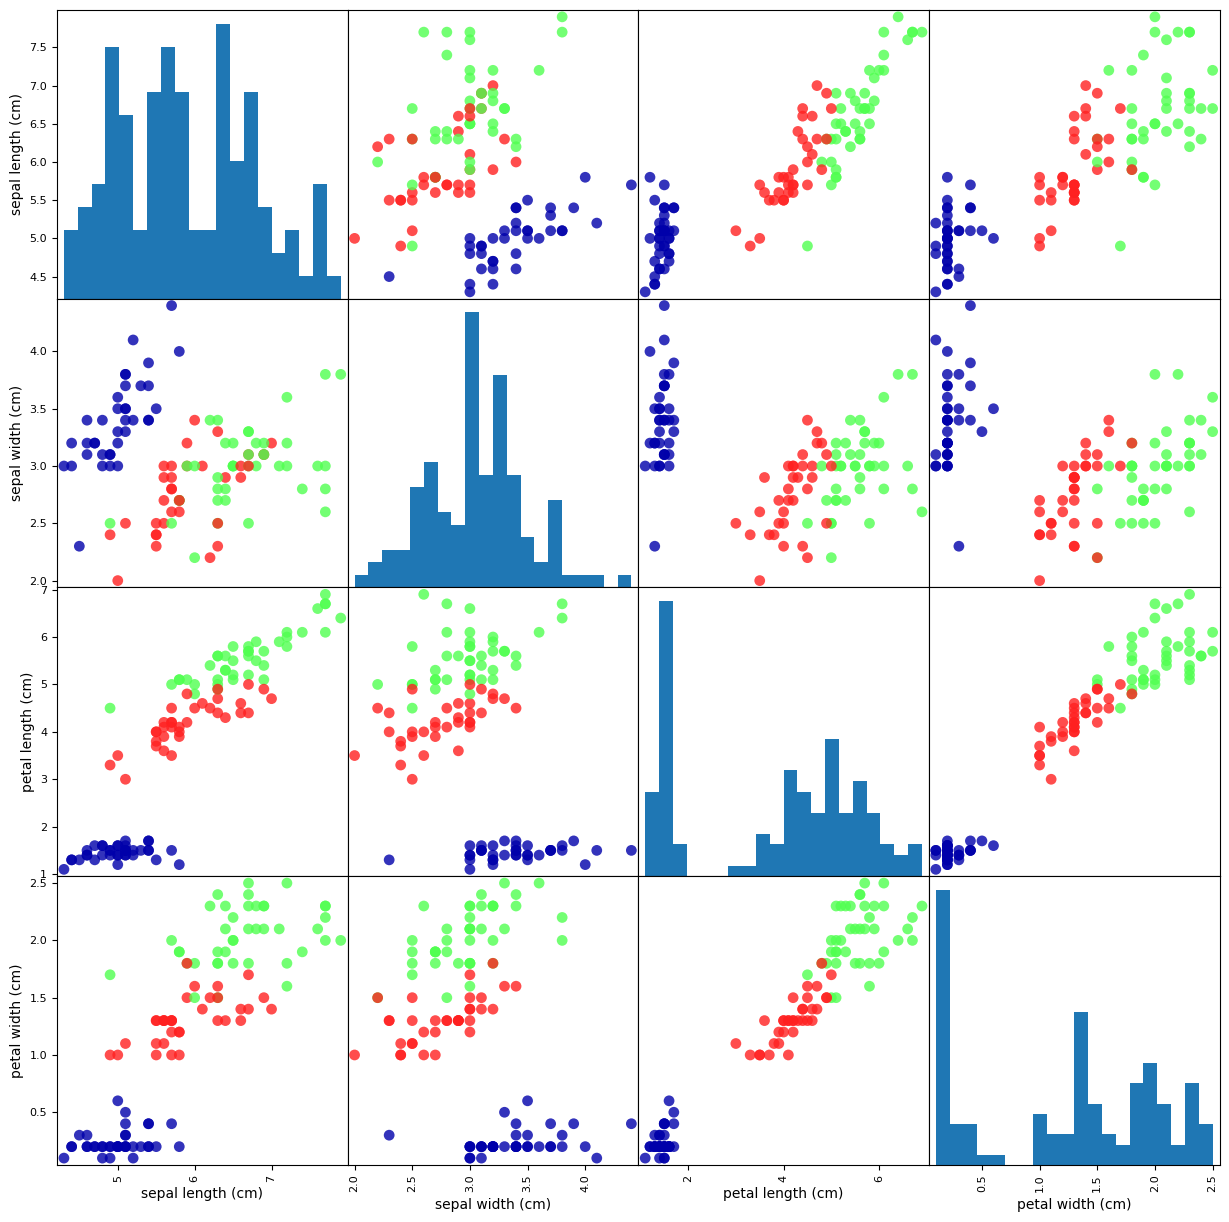

In [16]:
iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)
grr = scatter_matrix(iris_dataframe, c=y_train, figsize=(15, 15), marker='o',hist_kwds={'bins': 20}, s=60, alpha=.8, cmap=mglearn.cm3)

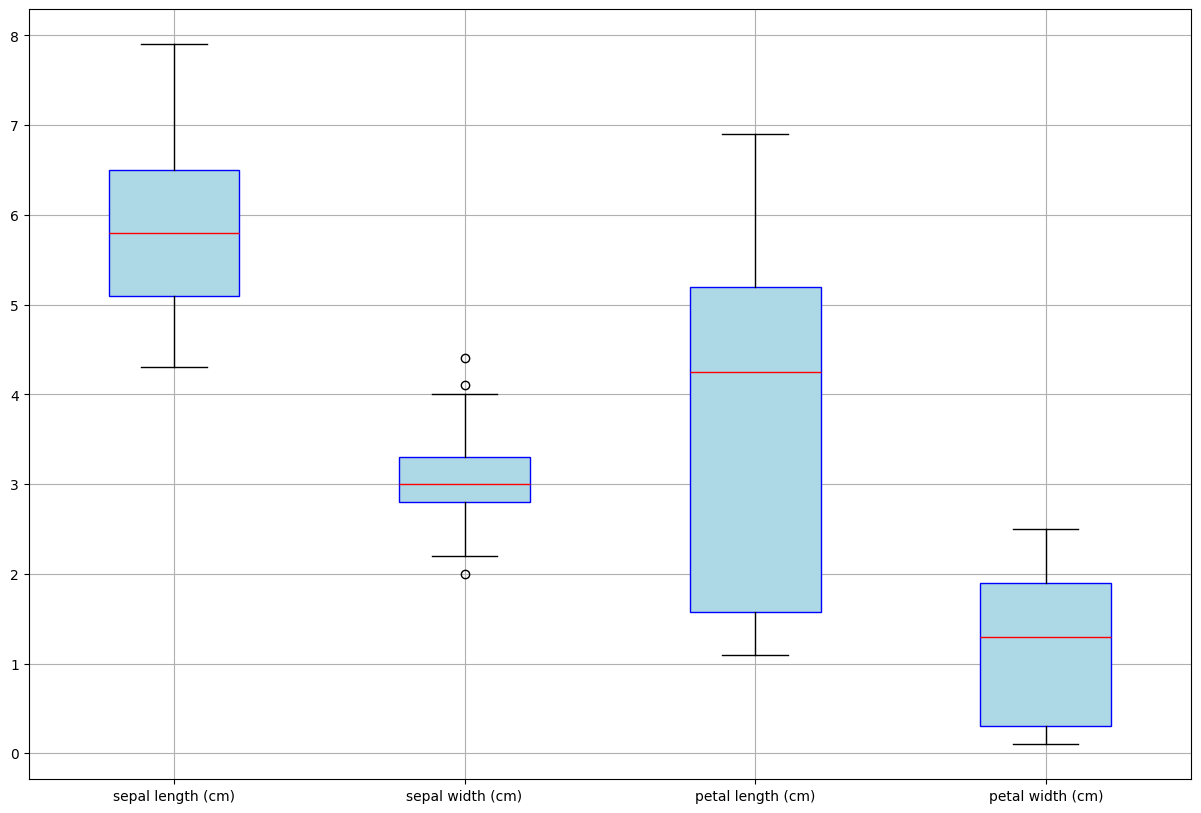

In [17]:
import matplotlib.pyplot as plt

iris_dataframe.boxplot(
    figsize = (15, 10),
    patch_artist = True,
    boxprops = dict(facecolor = 'lightblue', color = 'blue'),
    medianprops = dict(color = 'red'),
    whiskerprops = dict(color = 'black')
)

plt.show()

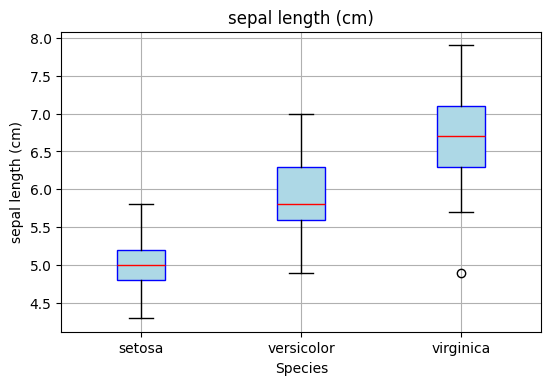

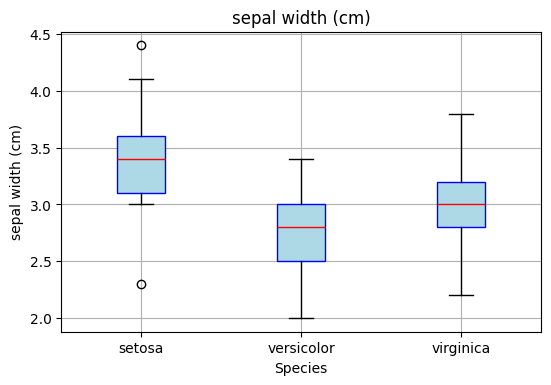

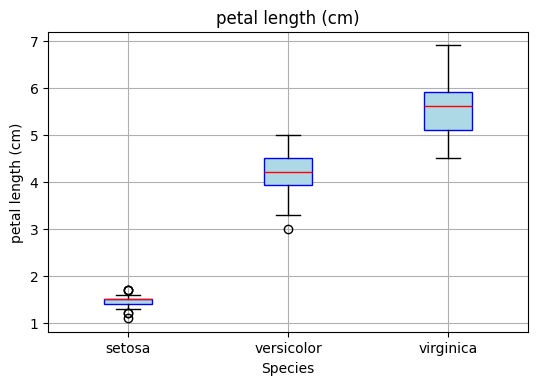

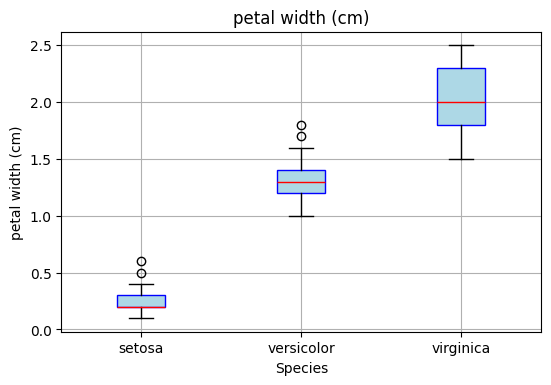

In [38]:
# add a new column called species to the dataframe and plot boxplots for each feature by species
iris_dataframe['species'] = [iris_dataset['target_names'][i] for i in y_train]
features = iris_dataset['feature_names']
for feature in features:
    iris_dataframe.boxplot(column = feature, by = 'species', figsize = (6, 4), patch_artist = True,
                           boxprops = dict(facecolor = 'lightblue', color = 'blue'),
                           medianprops = dict(color = 'red'),
                           whiskerprops = dict(color = 'black'))
    plt.title(feature)
    plt.suptitle('')
    plt.xlabel("Species")
    plt.ylabel(feature)
    plt.show()

### Observations:
> especially the petal length clearly seperates one species from the other, since the unique lenghts are all no more than 2 cm while for the other two species the petals are longer  
> the same holds for petal width  
> for sepal length and sepal width there are many overlaps also in between the classes so it might be a less useful feature to compare and classify 

## Bonus:

In [18]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, MaxAbsScaler, Normalizer

In [19]:
# create a dataframe with only 1st and 3rd feature
lengths = iris_dataset.data[:, [0,2]]
lengths_df = pd.DataFrame(lengths, columns = [iris_dataset.feature_names[0], iris_dataset.feature_names[2]])

In [20]:
# create a dictionary for the scalers we want to apply
scalers = {
    "StandardScaler": StandardScaler(),
    "MinMaxScaler": MinMaxScaler(),
    "RobustScaler": RobustScaler(),
    "MaxAbsScaler": MaxAbsScaler(),
    "Normalizer": Normalizer()
}

scaled_data = {}
for name, scaler in scalers.items():
    scaled_data[name] = scaler.fit_transform(lengths)

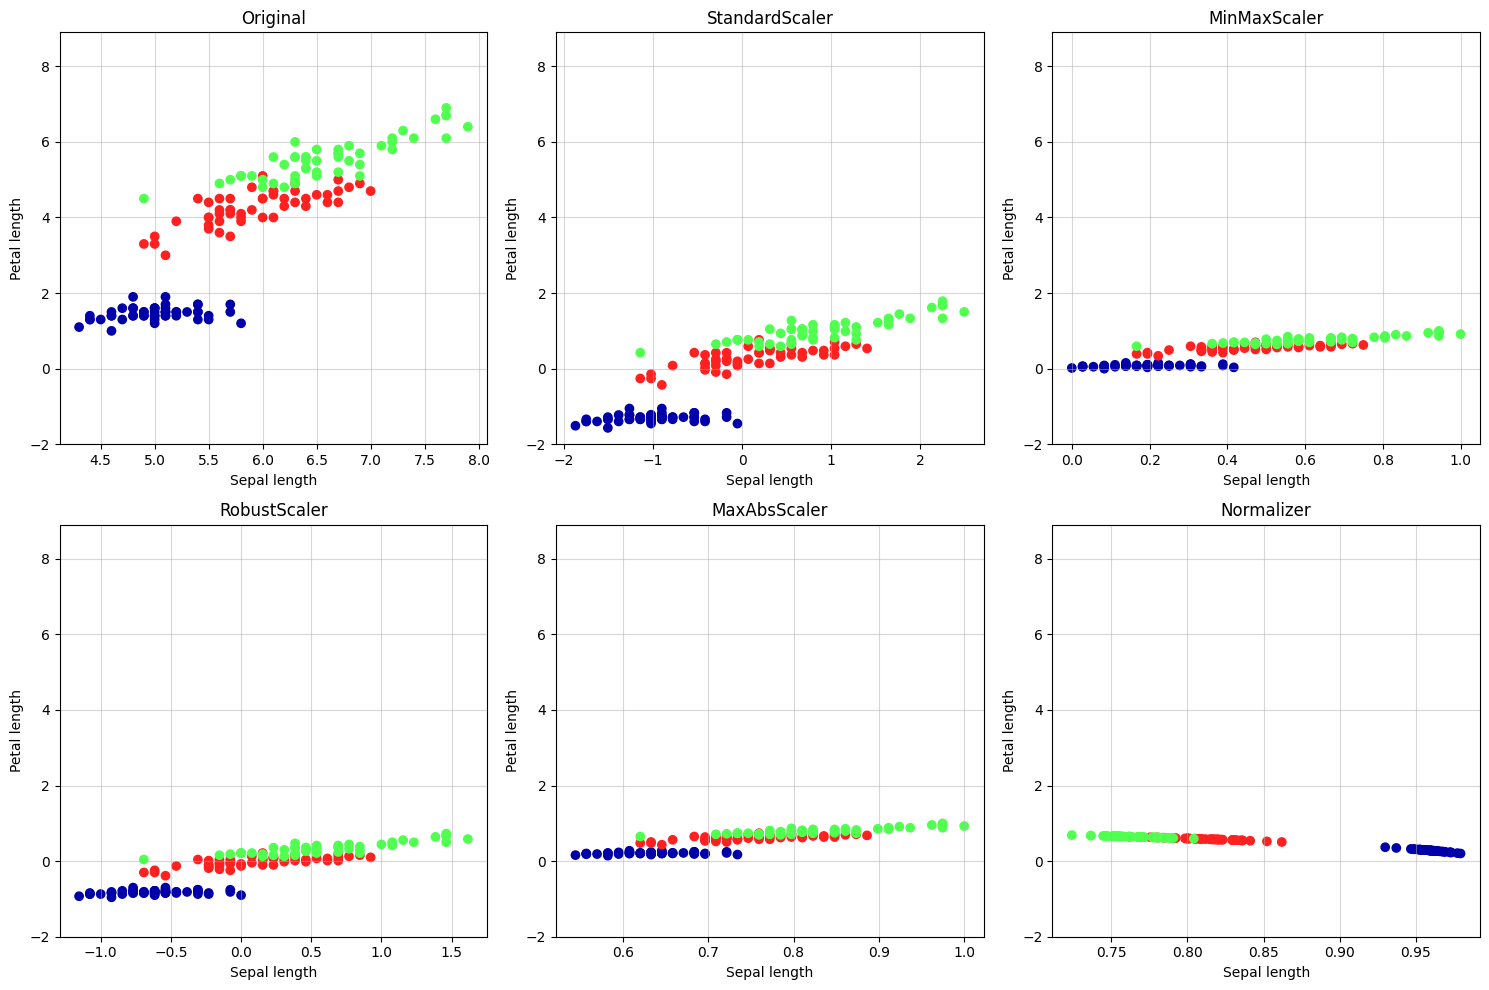

In [39]:

plt.figure(figsize=(15, 10))

# plot the original data
plt.subplot(2, 3, 1)
plt.scatter(lengths[:, 0], lengths[:, 1], c=y, cmap=mglearn.cm3, zorder = 3)
plt.title("Original")
plt.xlabel("Sepal length")
plt.ylabel("Petal length")
plt.ylim(-2 ,lengths.max().max() + 1)
plt.grid(True, alpha = 0.5)

# plot the scaled data for each scaler individually
image_idx = 2
for name, data in scaled_data.items():
    plt.subplot(2, 3, image_idx)
    image_idx += 1
    plt.scatter(data[:, 0], data[:, 1], c = y, cmap=mglearn.cm3)
    plt.title(name)
    plt.xlabel("Sepal length")
    plt.ylabel("Petal length")
    plt.ylim(-2 ,lengths.max().max() + 1)
    plt.grid(True, alpha = 0.5)

plt.tight_layout()
plt.show()

### Scaler effects

-> standard scaler: centers each feature around mean = 0 and scales it to variance 1. Keeps the shape of the distribution but removes scaling differences  
-> Min-Max scaler: scales each festure to a value in [0,1]. Preserves shape but compresses values.  
-> robust scaler: centers by median and scales according to the interquartile range.  
-> Max-Abs scaler: divides each feature by its maximum value. maps each value to a number in [-1,1] (in our case no negative values)  
-> Normalizer: scales everything to unit length. does not preserve the shape. Is used when only the directions matter.   